### http://dreamai.io/files/m1u2/nb6-ex.zip

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import statistics
import math
import my_utils
import dataframe_solution
import knn

In [39]:
def read_csv(csv_file):
    import csv
    data = [line for line in csv.reader(open("housing.csv"), delimiter=",")]
    return dataframe_solution.DataFrame(data)

In [40]:
df = read_csv('housing.csv')

{'longitude': (20640, <class 'float'>), 'latitude': (20640, <class 'float'>), 'housing_median_age': (20640, <class 'float'>), 'total_rooms': (20640, <class 'float'>), 'total_bedrooms': (20640, <class 'float'>), 'population': (20640, <class 'float'>), 'households': (20640, <class 'float'>), 'median_income': (20640, <class 'float'>), 'median_house_value': (20640, <class 'float'>), 'ocean_proximity': (20640, <class 'str'>)}


In [5]:
df.columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [6]:
len(df.dict_['ocean_proximity'])

20640

In [7]:
df.display(row_range=(0,100),col_range=(0,len(df.columns)))

('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity')
[(0, [-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 452600.0, 'NEAR BAY']), (1, [-122.22, 37.86, 21.0, 7099.0, 1106.0, 2401.0, 1138.0, 8.3014, 358500.0, 'NEAR BAY']), (2, [-122.24, 37.85, 52.0, 1467.0, 190.0, 496.0, 177.0, 7.2574, 352100.0, 'NEAR BAY']), (3, [-122.25, 37.85, 52.0, 1274.0, 235.0, 558.0, 219.0, 5.6431, 341300.0, 'NEAR BAY']), (4, [-122.25, 37.85, 52.0, 1627.0, 280.0, 565.0, 259.0, 3.8462, 342200.0, 'NEAR BAY']), (5, [-122.25, 37.85, 52.0, 919.0, 213.0, 413.0, 193.0, 4.0368, 269700.0, 'NEAR BAY']), (6, [-122.25, 37.84, 52.0, 2535.0, 489.0, 1094.0, 514.0, 3.6591, 299200.0, 'NEAR BAY']), (7, [-122.25, 37.84, 52.0, 3104.0, 687.0, 1157.0, 647.0, 3.12, 241400.0, 'NEAR BAY']), (8, [-122.26, 37.84, 42.0, 2555.0, 665.0, 1206.0, 595.0, 2.0804, 226700.0, 'NEAR BAY']), (9, [-122.25, 37.84, 52.0, 3549.0, 707

In [8]:
df.info()

{'longitude': (20640, <class 'float'>), 'latitude': (20640, <class 'float'>), 'housing_median_age': (20640, <class 'float'>), 'total_rooms': (20640, <class 'float'>), 'total_bedrooms': (20640, <class 'float'>), 'population': (20640, <class 'float'>), 'households': (20640, <class 'float'>), 'median_income': (20640, <class 'float'>), 'median_house_value': (20640, <class 'float'>), 'ocean_proximity': (20640, <class 'str'>)}


In [41]:
df.count_missing()

{'longitude': 0, 'latitude': 0, 'housing_median_age': 0, 'total_rooms': 0, 'total_bedrooms': 207, 'population': 0, 'households': 0, 'median_income': 0, 'median_house_value': 0}


In [42]:
df.replace_missing()

In [43]:
df.value_counts()

{'housing_median_age': {41.0: 296, 21.0: 446, 52.0: 1273, 42.0: 368, 50.0: 136, 40.0: 304, 49.0: 134, 48.0: 177, 51.0: 48, 43.0: 353, 2.0: 58, 46.0: 245, 26.0: 619, 20.0: 465, 17.0: 698, 36.0: 862, 19.0: 502, 23.0: 448, 38.0: 394, 35.0: 824, 10.0: 264, 16.0: 771, 27.0: 488, 39.0: 369, 31.0: 458, 29.0: 461, 22.0: 399, 37.0: 537, 28.0: 471, 34.0: 689, 32.0: 565, 47.0: 198, 44.0: 356, 30.0: 476, 18.0: 570, 45.0: 294, 33.0: 615, 24.0: 478, 15.0: 512, 14.0: 412, 13.0: 302, 25.0: 566, 5.0: 244, 12.0: 238, 6.0: 160, 8.0: 206, 9.0: 205, 7.0: 175, 3.0: 62, 4.0: 191, 11.0: 254, 1.0: 4}, 'ocean_proximity': {'NEAR BAY': 2290, '<1H OCEAN': 9136, 'INLAND': 6551, 'NEAR OCEAN': 2658, 'ISLAND': 5}}


In [12]:
df.dict_['ocean_proximity']

['NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',
 'NEAR BAY',

In [44]:
df.add_one_hot_columns(['ocean_proximity'])

{'longitude': (20640, <class 'float'>), 'latitude': (20640, <class 'float'>), 'housing_median_age': (20640, <class 'float'>), 'total_rooms': (20640, <class 'float'>), 'total_bedrooms': (20640, <class 'float'>), 'population': (20640, <class 'float'>), 'households': (20640, <class 'float'>), 'median_income': (20640, <class 'float'>), 'median_house_value': (20640, <class 'float'>), 'ocean_proximityNEAR BAY': (20640, <class 'int'>), 'ocean_proximity<1H OCEAN': (20640, <class 'int'>), 'ocean_proximityINLAND': (20640, <class 'int'>), 'ocean_proximityNEAR OCEAN': (20640, <class 'int'>), 'ocean_proximityISLAND': (20640, <class 'int'>)}


In [25]:
len(df)

20640

In [26]:
df_slice = df.get_rows_slice((0,len(df)//2))

In [27]:
len(df_slice)

10320

In [28]:
df_slice[0]

(0,
 [-122.23,
  37.88,
  41.0,
  880.0,
  129.0,
  322.0,
  126.0,
  8.3252,
  452600.0,
  1,
  0,
  0,
  0,
  0])

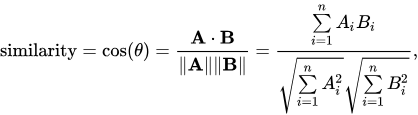

In [30]:
x = [4.75,4.5,5,4.25,4]
y = [4.75,4.5,5,4.25,4]
my_utils.cosine_similarity(x,y)

1.0000000000000002

In [31]:
x = [4.75,4.5,5,4.25,4]
del x[2]
x

[4.75, 4.5, 4.25, 4]

In [45]:
training_data = df.get_rows_slice((0,18000))

In [46]:
knn = knn.KNN()

In [47]:
knn.fit(training_data,8)

In [48]:
knn.target[1],df.data[1][1]

(358500.0,
 [-122.22,
  37.86,
  21.0,
  7099.0,
  1106.0,
  2401.0,
  1138.0,
  8.3014,
  358500.0,
  1,
  0,
  0,
  0,
  0])

In [49]:
len(knn.data[0]),len(knn.target)

(13, 18000)

In [50]:
df.data[18001][1]

[-121.98,
 37.28,
 28.0,
 3688.0,
 633.0,
 1877.0,
 620.0,
 5.7251,
 272600.0,
 0,
 1,
 0,
 0,
 0]

In [51]:
input_row = df.data[18001][1].copy()
input_row.remove(input_row[8])
input_row,df.data[18001][1]

([-121.98, 37.28, 28.0, 3688.0, 633.0, 1877.0, 620.0, 5.7251, 0, 1, 0, 0, 0],
 [-121.98,
  37.28,
  28.0,
  3688.0,
  633.0,
  1877.0,
  620.0,
  5.7251,
  272600.0,
  0,
  1,
  0,
  0,
  0])

In [52]:
knn.predict(input_row)

([(0.9999903614306849, 949, 221300.0),
  (0.9999881997796937, 17640, 255600.0),
  (0.9999849433316121, 14968, 178100.0),
  (0.9999823596157527, 2307, 84200.0),
  (0.9999815724865491, 11950, 126900.0)],
 173220.0)

In [53]:
df.data[18001][1][8]

272600.0

In [54]:
df.dict_['median_house_value'][18001]

272600.0

In [55]:
targets = df.dict_['median_house_value'][18001:]
targets[:10]

[272600.0,
 275000.0,
 273500.0,
 344100.0,
 303400.0,
 275000.0,
 283000.0,
 300300.0,
 265300.0,
 278000.0]

In [56]:
test_data = df.data[18001:].copy()

In [57]:
test_data[0][1]

[-121.98,
 37.28,
 28.0,
 3688.0,
 633.0,
 1877.0,
 620.0,
 5.7251,
 272600.0,
 0,
 1,
 0,
 0,
 0]

In [58]:
for  row in test_data:
    #print(row[1][8])
    row[1].remove(row[1][8])

In [59]:
[(predictions[i] - targets[i])**2 for i in range(10)]

NameError: name 'predictions' is not defined

In [60]:
test_data

[(18001,
  [-121.98, 37.28, 28.0, 3688.0, 633.0, 1877.0, 620.0, 5.7251, 0, 1, 0, 0, 0]),
 (18002,
  [-121.98, 37.28, 27.0, 3526.0, 589.0, 1725.0, 553.0, 5.7812, 0, 1, 0, 0, 0]),
 (18003,
  [-121.99, 37.27, 27.0, 2937.0, 497.0, 1454.0, 511.0, 5.4051, 0, 1, 0, 0, 0]),
 (18004,
  [-121.99, 37.29, 32.0, 2930.0, 481.0, 1336.0, 481.0, 6.4631, 0, 1, 0, 0, 0]),
 (18005,
  [-121.96, 37.3, 23.0, 4040.0, 843.0, 2181.0, 843.0, 4.0403, 0, 1, 0, 0, 0]),
 (18006,
  [-121.97, 37.3, 31.0, 3340.0, 735.0, 1891.0, 686.0, 4.8542, 0, 1, 0, 0, 0]),
 (18007,
  [-121.96, 37.29, 24.0, 1240.0, 263.0, 690.0, 276.0, 5.0, 0, 1, 0, 0, 0]),
 (18008,
  [-121.97, 37.29, 25.0, 4096.0, 743.0, 2027.0, 741.0, 5.3294, 0, 1, 0, 0, 0]),
 (18009,
  [-121.97, 37.29, 29.0, 2721.0, 682.0, 1602.0, 646.0, 3.337, 0, 1, 0, 0, 0]),
 (18010,
  [-121.99, 37.27, 17.0, 1527.0, 267.0, 775.0, 260.0, 5.9658, 0, 1, 0, 0, 0]),
 (18011,
  [-121.98, 37.27, 25.0, 3075.0, 564.0, 1633.0, 543.0, 5.2528, 0, 1, 0, 0, 0]),
 (18012,
  [-121.98, 37.27, 2

In [61]:
len(test_data[0][1])

13

In [66]:
predictions = [knn.predict(test_data[i][1])[1] for i in range(len(test_data))]

In [69]:
predictions

[173220.0,
 177800.0,
 201980.0,
 257980.0,
 173040.0,
 184720.0,
 186980.0,
 253380.0,
 252620.0,
 181940.0,
 148660.0,
 196720.0,
 157360.0,
 185220.0,
 238640.0,
 199920.0,
 206780.0,
 215800.0,
 274180.0,
 209140.0,
 301540.2,
 256800.0,
 278100.0,
 195540.0,
 168280.0,
 283660.0,
 197240.0,
 368260.0,
 112860.0,
 251760.0,
 229460.0,
 340460.2,
 290900.0,
 262100.0,
 145520.0,
 237960.0,
 356500.0,
 469400.4,
 286140.0,
 209880.0,
 218060.0,
 372600.0,
 408600.4,
 289340.0,
 300000.0,
 413160.2,
 243060.2,
 291720.0,
 232580.0,
 379720.2,
 487980.8,
 377080.6,
 482940.8,
 466360.8,
 423920.4,
 410480.2,
 337140.2,
 389640.4,
 395060.4,
 436480.4,
 406920.6,
 347440.2,
 186760.0,
 455120.6,
 349300.2,
 407100.2,
 311240.0,
 364560.0,
 437880.6,
 410120.2,
 382660.0,
 223000.0,
 376000.2,
 305820.0,
 450380.4,
 465100.6,
 421280.4,
 351660.0,
 401100.2,
 449520.6,
 465100.6,
 472120.6,
 251180.0,
 177320.0,
 274460.0,
 300080.0,
 453560.4,
 245500.0,
 205460.0,
 317100.0,
 191720.0,

In [ ]:
targets[:10]

In [68]:
my_utils.rmse(predictions,targets)

99621.7215474964

In [ ]:
|